In [1]:
import sys
sys.path.append("..")

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from reinforcetrader.dqn_agent import DRLAgent
from reinforcetrader.explainable_utils import ModelExplainer

# DQN Architecture Analysis

In [2]:
# Set the keras model path below
MODEL_PATH = '../model_checkpoints/DDQN_DSRC_AE1.keras'

# Create explainer object (Load keras model)
explainer = ModelExplainer(MODEL_PATH)

I0000 00:00:1766732898.541480  202359 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2328 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model successfully loaded from ../model_checkpoints/DDQN_DSRC_AE1.keras


In [3]:
# Get DQN summary (layer names, shapes, etc.)
explainer.get_model_summary()

Model: "DualBranchDQN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ state_input         │ (None, 60, 13)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reward_input        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 60, 64)    │      2,560 │ state_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        128 │ reward_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 60, 32)    │      6,176 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 60, 32)    │      3,104 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ conv1d_2[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state_output        │ (None, 64)        │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reward_output       │ (None, 4)         │         68 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ late_fusion         │ (None, 68)        │          0 │ state_output[0][… │
│ (Concatenate)       │                   │            │ reward_output[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      4,416 │ late_fusion[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │        528 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ advantage_value     │ (None, 3)         │         51 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        528 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mean (Mean)         │ (None, 1)         │          0 │ advantage_value[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state_value (Dense) │ (None, 1)         │         17 │ dense_4[0][0]   

 Total params: 60,554 (236.54 KB)

 Trainable params: 20,184 (78.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,370 (157.70 KB)

## Understanding Using Grad-CAM Method

In [4]:
# Load the saved state representations of the DRL agent
SCENARIO_TICKER = 'PG'
BUY_DATE = pd.to_datetime('2020-01-07')
SELL_DATE = pd.to_datetime('2020-01-09')

def load_state_pickle(date: pd.Timestamp, ticker, fname: str) -> pd.DataFrame | dict | None:
    rel_path = lambda fname : f'../data/test/states/{ticker}_{date.strftime("%Y_%m_%d")}_{fname}.pkl'
    state_obj = None
    with open(rel_path(fname), 'rb') as handle:
        state_obj = pickle.load(handle)
    return state_obj

buy_state = load_state_pickle(BUY_DATE, SCENARIO_TICKER, 'buy_state')
sell_state = load_state_pickle(SELL_DATE, SCENARIO_TICKER, 'sell_state')
buy_rc = load_state_pickle(BUY_DATE, SCENARIO_TICKER, 'buy_rc')
sell_rc = load_state_pickle(SELL_DATE, SCENARIO_TICKER, 'sell_rc')

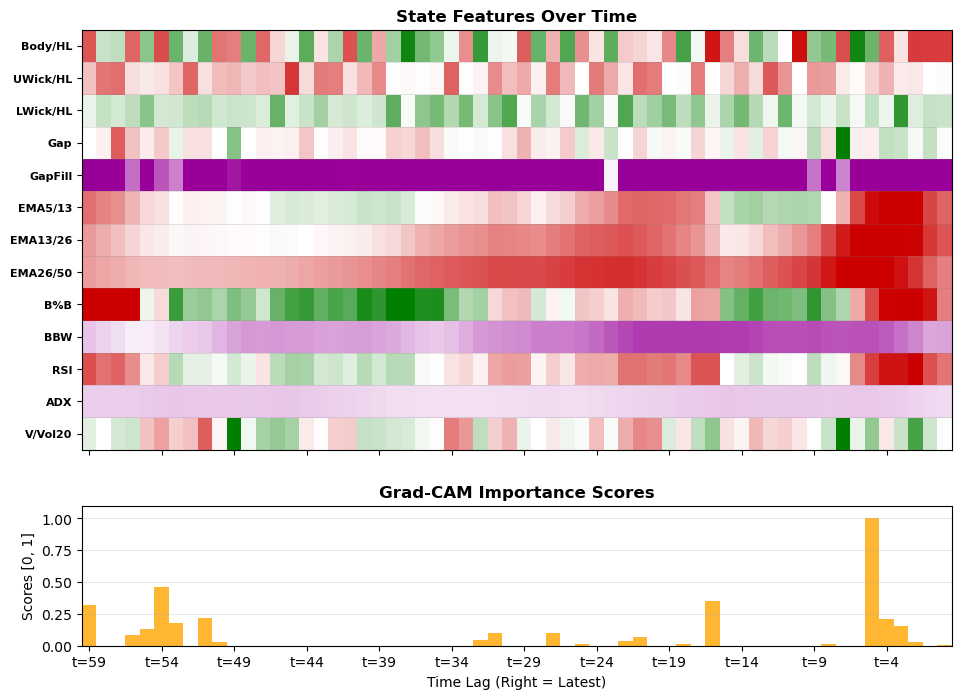

In [5]:
# Choose the last layer for grad-CAM
LAYER_NAME = 'conv1d_2'

# Run the grad-CAM on last 1d conv layer in the CNN branch
explainer.run_grad_cam(buy_state, buy_rc, trade_pos=DRLAgent.OUT_TRADE, action=DRLAgent.A_BUY, layer_name=LAYER_NAME)